# Trabalho de Inteligência Artificial I



### __ Prof:__ Hitoshi Nagano, Ph.D. 

### __Aluno:__ João Roberto Perin

##  
  
## Instruções:

1) __Baixar os datasets em:__  https://www.kaggle.com/c/home-credit-default-risk/data

2) __Explorar conforme instruções:__  

 * __application_train.csv:__ Esse csv possui 122 colunas: explorar 40 colunas sendo as primeiras 30 obrigatórias e 10 adicionais a escolher.  
 
 * 30 colunas obrigatórias:  

>  SK_ID_CURR  
>  TARGET  
>  NAME_CONTRACT_TYPE  
>  CODE_GENDER  
>  FLAG_OWN_CAR  
>  FLAG_OWN_REALTY  
>  CNT_CHILDREN  
>  AMT_INCOME_TOTAL  
>  AMT_CREDIT  
>  AMT_ANNUITY  
>  AMT_GOODS_PRICE  
>  NAME_TYPE_SUITE  
>  NAME_INCOME_TYPE  
>  NAME_EDUCATION_TYPE  
>  NAME_FAMILY_STATUS  
>  NAME_HOUSING_TYPE  
>  REGION_POPULATION_RELATIVE  
>  DAYS_BIRTH  
>  DAYS_EMPLOYED  
>  DAYS_REGISTRATION  
>  DAYS_ID_PUBLISH  
>  OWN_CAR_AGE  
>  FLAG_MOBIL  
>  FLAG_EMP_PHONE  
>  FLAG_WORK_PHONE  
>  FLAG_CONT_MOBILE  
>  FLAG_PHONE  
>  FLAG_EMAIL   
>  OCCUPATION_TYPE  
>  CNT_FAM_MEMBERS  
       
 * alunos deverão se organizar para que todas as colunas sejam exploradas
 * escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'
 
>  HomeCredit_columns_description.csv  
>  POS_CASH_balance.csv  
>  credit_card_balance.csv  
>  installments_payments.csv  
>  application_train.csv  
>  bureau.csv  
>  previous_application.csv  
>  bureau_balance.csv  
>  sample_submission.csv  

3) __objetivos:__
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariada, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) __entregável:__ jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) __entrega limite:__ 8/agosto/2018 

6) __trabalho individual.__ Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) __avaliação:__
* jupyter notebook e arguição (se houver)

# Definição dos dados de trabalho

In [2]:
import pandas as pd

semente = 2306 # <-- Data de aniversário


df = pd.read_csv('./data/application_train.csv', index_col=0)

# Reset do indice para liberar a coluna SK_ID_CURR
df.reset_index(inplace = True)


# Pegando as 30 colunas obrigatórias
df30 = df.iloc[:,0:30]

# Pegando colunas a partir da 31 (30 pq é indice 0) para sorteio
df_temp=df.iloc[:,30:]

# Sorteio de 10 colunas com a semente Data Aniversario
df10 = df_temp.sample(10,axis=1,random_state=semente)

# Juntar todas as colunas 30 obrigatorias + 10 do sorteio
df40 = pd.concat([df30, df10], axis=1)

# Imprimir o resultado:
i = 1
for x in df40.columns:
    print(str(i) + " - " + x)
    i += 1

1 - SK_ID_CURR
2 - TARGET
3 - NAME_CONTRACT_TYPE
4 - CODE_GENDER
5 - FLAG_OWN_CAR
6 - FLAG_OWN_REALTY
7 - CNT_CHILDREN
8 - AMT_INCOME_TOTAL
9 - AMT_CREDIT
10 - AMT_ANNUITY
11 - AMT_GOODS_PRICE
12 - NAME_TYPE_SUITE
13 - NAME_INCOME_TYPE
14 - NAME_EDUCATION_TYPE
15 - NAME_FAMILY_STATUS
16 - NAME_HOUSING_TYPE
17 - REGION_POPULATION_RELATIVE
18 - DAYS_BIRTH
19 - DAYS_EMPLOYED
20 - DAYS_REGISTRATION
21 - DAYS_ID_PUBLISH
22 - OWN_CAR_AGE
23 - FLAG_MOBIL
24 - FLAG_EMP_PHONE
25 - FLAG_WORK_PHONE
26 - FLAG_CONT_MOBILE
27 - FLAG_PHONE
28 - FLAG_EMAIL
29 - OCCUPATION_TYPE
30 - CNT_FAM_MEMBERS
31 - DEF_30_CNT_SOCIAL_CIRCLE
32 - FLAG_DOCUMENT_8
33 - FLAG_DOCUMENT_3
34 - FLAG_DOCUMENT_15
35 - LIVINGAREA_MEDI
36 - EMERGENCYSTATE_MODE
37 - REGION_RATING_CLIENT_W_CITY
38 - FLOORSMIN_AVG
39 - FLAG_DOCUMENT_19
40 - ORGANIZATION_TYPE


# Carga dos Dados

In [28]:
import pandas as pd
pd.set_option('display.precision', 2)
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [ ]:
df = df40

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

### Colunas que apresentam NaNs:

__Total de Registros:__  307511
> ```
> AMT_ANNUITY                    307499 non-null float64
> AMT_GOODS_PRICE                307233 non-null float64
> NAME_TYPE_SUITE                306219 non-null object
> OWN_CAR_AGE                    104582 non-null float64
> OCCUPATION_TYPE                211120 non-null object
> CNT_FAM_MEMBERS                307509 non-null float64
> DEF_30_CNT_SOCIAL_CIRCLE       306490 non-null float64
> CNT_FAM_MEMBERS                307509 non-null float64
> DEF_30_CNT_SOCIAL_CIRCLE       306490 non-null float64
> LIVINGAREA_MEDI                153161 non-null float64
> EMERGENCYSTATE_MODE            161756 non-null object
> EMERGENCYSTATE_MODE            161756 non-null object
> FLOORSMIN_AVG                   98869 non-null float64
```

In [ ]:
df = 

In [30]:
df.shape

(307511, 40)

In [31]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [32]:
df.set_index('SK_ID_CURR')

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,FLAG_DOCUMENT_15,LIVINGAREA_MEDI,EMERGENCYSTATE_MODE,REGION_RATING_CLIENT_W_CITY,FLOORSMIN_AVG,FLAG_DOCUMENT_19,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202.500k,406.598k,24.700k,351.000k,...,2.000,0,1,0,19.300m,No,2,125.000m,0,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,270.000k,1.294M,35.698k,1.130M,...,0.000,0,1,0,55.800m,No,1,333.300m,0,School
100004,0,Revolving loans,M,Y,Y,0,67.500k,135.000k,6.750k,135.000k,...,0.000,0,0,0,NaN,NaN,2,NaN,0,Government
100006,0,Cash loans,F,N,Y,0,135.000k,312.682k,29.686k,297.000k,...,0.000,0,1,0,NaN,NaN,2,NaN,0,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,121.500k,513.000k,21.866k,513.000k,...,0.000,1,0,0,NaN,NaN,2,NaN,0,Religion
100008,0,Cash loans,M,N,Y,0,99.000k,490.496k,27.518k,454.500k,...,0.000,0,1,0,NaN,NaN,2,NaN,0,Other
100009,0,Cash loans,F,Y,Y,1,171.000k,1.561M,41.301k,1.395M,...,0.000,1,0,0,NaN,NaN,2,NaN,0,Business Entity Type 3
100010,0,Cash loans,M,Y,Y,0,360.000k,1.530M,42.075k,1.530M,...,0.000,0,1,0,NaN,NaN,3,NaN,0,Other
100011,0,Cash loans,F,N,Y,0,112.500k,1.020M,33.826k,913.500k,...,0.000,0,1,0,NaN,NaN,2,NaN,0,XNA


In [33]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,FLAG_DOCUMENT_15,LIVINGAREA_MEDI,EMERGENCYSTATE_MODE,REGION_RATING_CLIENT_W_CITY,FLOORSMIN_AVG,FLAG_DOCUMENT_19,ORGANIZATION_TYPE
13888,116192,0,Cash loans,F,N,N,0,144.000k,765.000k,22.365k,...,0.000,0,1,0,NaN,NaN,2,NaN,0,Agriculture
51037,159100,0,Revolving loans,F,N,Y,0,175.500k,247.500k,12.375k,...,0.000,0,0,0,NaN,NaN,2,NaN,0,Business Entity Type 1
139552,261803,0,Revolving loans,M,Y,Y,2,450.000k,900.000k,45.000k,...,NaN,0,0,0,30.700m,No,1,NaN,0,Business Entity Type 3
65482,175940,1,Cash loans,F,N,Y,0,157.500k,397.881k,20.601k,...,0.000,0,1,0,NaN,NaN,3,NaN,0,Business Entity Type 3
168785,295642,0,Revolving loans,F,N,Y,2,112.500k,135.000k,6.750k,...,0.000,0,0,0,11.900m,No,1,83.300m,0,Kindergarten


In [34]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_EMAIL,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_8,FLAG_DOCUMENT_3,FLAG_DOCUMENT_15,LIVINGAREA_MEDI,REGION_RATING_CLIENT_W_CITY,FLOORSMIN_AVG,FLAG_DOCUMENT_19
count,307.511k,307.511k,307.511k,307.511k,307.511k,307.499k,307.233k,307.511k,307.511k,307.511k,...,307.511k,307.509k,306.490k,307.511k,307.511k,307.511k,153.161k,307.511k,98.869k,307.511k
mean,278.181k,80.729m,417.052m,168.798k,599.026k,27.109k,538.396k,20.868m,-16.037k,63.815k,...,56.720m,2.153,143.421m,81.376m,710.023m,1.210m,108.607m,2.032,231.894m,595.101u
std,102.790k,272.419m,722.121m,237.123k,402.491k,14.494k,369.446k,13.831m,4.364k,141.276k,...,231.307m,910.682m,446.698m,273.412m,453.752m,34.760m,112.260m,502.737m,161.380m,24.387m
min,100.002k,0.000,0.000,25.650k,45.000k,1.616k,40.500k,290.000u,-25.229k,-17.912k,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
25%,189.146k,0.000,0.000,112.500k,270.000k,16.524k,238.500k,10.006m,-19.682k,-2.760k,...,0.000,2.000,0.000,0.000,0.000,0.000,45.700m,2.000,83.300m,0.000
50%,278.202k,0.000,0.000,147.150k,513.531k,24.903k,450.000k,18.850m,-15.750k,-1.213k,...,0.000,2.000,0.000,0.000,1.000,0.000,74.900m,2.000,208.300m,0.000
75%,367.142k,0.000,1.000,202.500k,808.650k,34.596k,679.500k,28.663m,-12.413k,-289.000,...,0.000,3.000,0.000,0.000,1.000,0.000,130.300m,2.000,375.000m,0.000
max,456.255k,1.000,19.000,117.000M,4.050M,258.026k,4.050M,72.508m,-7.489k,365.243k,...,1.000,20.000,34.000,1.000,1.000,1.000,1.000,3.000,1.000,1.000


In [128]:
df_nulls = df.apply(lambda x: (sum(x.isnull()) / 307511),axis=0)
#df_nulls = pd.DataFrame([df.apply(lambda x: sum(x.isnull()),axis=0)])

In [129]:
import matplotlib.pyplot as plt

%matplotlib inline

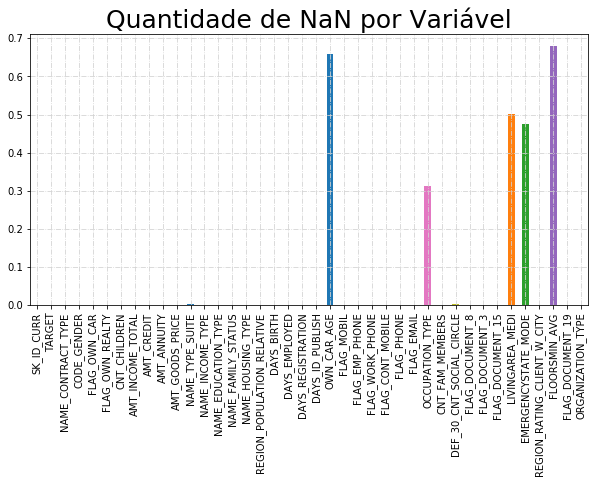

In [132]:
plt.figure()

df_nulls.plot(
    kind = 'bar',
    figsize = (10,5),
    fontsize = '10',
    style='k--',
    
)
plt.grid(True)
plt.title("Quantidade de NaN por Variável", fontsize = 25)
plt.rc('grid', linestyle="-.", color="lightgray")

#plt.legend(loc='best')
plt.show()


In [145]:
import seaborn as sns
df_nulls

SK_ID_CURR                        0.000
TARGET                            0.000
NAME_CONTRACT_TYPE                0.000
CODE_GENDER                       0.000
FLAG_OWN_CAR                      0.000
FLAG_OWN_REALTY                   0.000
CNT_CHILDREN                      0.000
AMT_INCOME_TOTAL                  0.000
AMT_CREDIT                        0.000
AMT_ANNUITY                     39.023u
AMT_GOODS_PRICE                904.033u
NAME_TYPE_SUITE                  4.201m
NAME_INCOME_TYPE                  0.000
NAME_EDUCATION_TYPE               0.000
NAME_FAMILY_STATUS                0.000
NAME_HOUSING_TYPE                 0.000
REGION_POPULATION_RELATIVE        0.000
DAYS_BIRTH                        0.000
DAYS_EMPLOYED                     0.000
DAYS_REGISTRATION                 0.000
DAYS_ID_PUBLISH                   0.000
OWN_CAR_AGE                    659.908m
FLAG_MOBIL                        0.000
FLAG_EMP_PHONE                    0.000
FLAG_WORK_PHONE                   0.000


In [143]:
#sns.load_dataset(df_nulls)
sns.jointplot(data=df_nulls,)

TypeError: jointplot() missing 2 required positional arguments: 'x' and 'y'

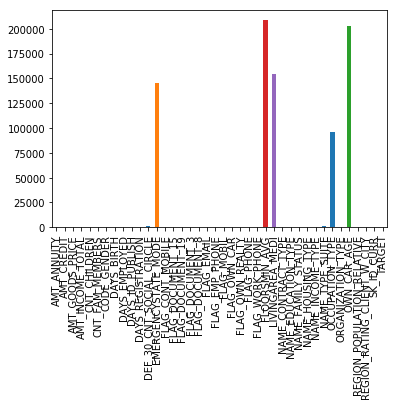

In [83]:
df_nulls.sort_index().plot(kind = 'bar', legend = False)
#df_nulls.set_index()